# A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [52]:
import pandas as pd
%matplotlib inline

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [53]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx")

In [54]:
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [55]:
df.shape

(81937, 15)

In [56]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [57]:
#"It's a dataset of all the dogs in NY. Each row is element of the dogs' detailed certificate. 
# For example,'Animal name' is the name of each dog while 'animal birth' is the date on which it was born.

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below.

In [58]:
# How many of the dogs are stray dogs?
# How many of the owners have them for more than a decade?
# What's the most popular breed in the city?
# How many of the dogs suffer from diseases vs those who are totally healthy?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

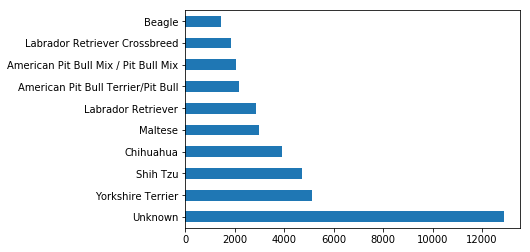

In [59]:
df['Primary Breed'].value_counts().head(10).plot(kind='barh')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

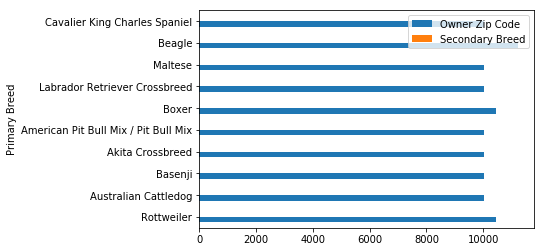

In [60]:
df[df['Primary Breed'] != 'Unknown'].head(10).plot(kind='barh', x='Primary Breed')

## What are the most popular dog names?

In [61]:
df['Animal Name'].value_counts().head(10)

UNKNOWN    742
Bella      527
Max        515
Charlie    403
Lola       387
Unknown    379
Rocky      354
Lucy       338
unknown    337
Coco       308
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [62]:
df[df['Animal Name'] == 'Maxwell'].count()

Owner Zip Code            30
Animal Name               30
Animal Gender             30
Primary Breed             30
Secondary Breed            4
Animal Dominant Color     30
Animal Secondary Color    21
Animal Third Color        10
Animal Birth              30
Spayed or Neut            30
Guard or Trained          19
Vaccinated                30
Application Date          30
License Issued Date       30
License Expired Date      30
dtype: int64

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [63]:
df['Guard or Trained'].value_counts(dropna=False)

No     49525
NaN    32361
Yes       51
Name: Guard or Trained, dtype: int64

In [64]:
df.groupby('Guard or Trained').describe()

Owner Zip Code                                              \
                          count          mean         std      min      25%   
Guard or Trained                                                              
No                      49525.0  10666.402322  617.979642   1003.0  10029.0   
Yes                        51.0  10730.333333  578.278676  10010.0  10128.0   

                                             
                      50%      75%      max  
Guard or Trained                             
No                10463.0  11229.0  53494.0  
Yes               11101.0  11235.5  11421.0

## What are the actual numbers?

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [65]:
df['Guard or Trained'].fillna("No").value_counts()

No     81886
Yes       51
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [66]:
guard_dogs = df[df['Guard or Trained'] == 'Yes']
guard_dogs['Primary Breed'].value_counts().head()

Unknown                                 11
German Shepherd Dog                      4
Chihuahua                                3
Labrador Retriever                       3
American Pit Bull Mix / Pit Bull Mix     3
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [67]:
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)

In [68]:
df.columns

Index(['Owner Zip Code', 'Animal Name', 'Animal Gender', 'Primary Breed',
       'Secondary Breed', 'Animal Dominant Color', 'Animal Secondary Color',
       'Animal Third Color', 'Animal Birth', 'Spayed or Neut',
       'Guard or Trained', 'Vaccinated', 'Application Date',
       'License Issued Date', 'License Expired Date', 'year'],
      dtype='object')

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [69]:
df['year'].value_counts().head()

2015    9665
2014    7749
2013    7331
2012    6889
2010    6624
Name: year, dtype: int64

In [70]:
df['age'] = 2017 - df['year']

In [71]:
df['age'].median()

7.0

# Joining data together

In [72]:
nyc_boros = pd.read_csv("zipcodes-neighborhoods.csv")
#nyc_boros['zip']
#df['Owner Zip Code']

In [94]:
df_merged = df.merge(nyc_boros, left_on="Owner Zip Code", right_on="zip")

In [95]:
df_merged.shape

(80859, 20)

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [97]:
df_merged.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,10,Upper West Side,10024,Manhattan
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,9,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,6,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,NaN,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,6,Upper West Side,10024,Manhattan
4,10024,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,10,Upper West Side,10024,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [76]:
UES = df_merged[df_merged['neighborhood'] == 'Upper East Side']
UES['Animal Name'].value_counts()  

Lucy                     40
Bella                    31
Coco                     29
Charlie                  29
NO NAME                  26
Lola                     25
Dog Name Not Provided    22
Bailey                   21
UNKNOWN                  20
Molly                    20
Oliver                   19
Buddy                    19
Penny                    18
Chloe                    18
Daisy                    18
Sammy                    17
Luna                     16
Max                      16
Lulu                     16
Teddy                    15
Leo                      15
Sophie                   15
Oscar                    15
Maggie                   15
Tucker                   14
Stella                   14
Lucky                    14
Lily                     14
Pepper                   13
Cooper                   12
                         ..
Plato                     1
NOAH                      1
GISELLE                   1
Spruce                    1
lily                

In [77]:
Bronx = df_merged[df_merged['borough'] == 'Bronx']
Bronx['Animal Name'].value_counts() 

Rocky                     60
Max                       56
Bella                     54
Lucky                     51
Princess                  43
Coco                      38
Lola                      33
Buddy                     28
Charlie                   28
Gizmo                     27
Oreo                      26
Prince                    25
Luna                      24
Mia                       24
Unknown                   23
Daisy                     22
Toby                      22
UNKNOWN                   21
Baby                      21
Lady                      21
Chloe                     20
Milo                      18
Shadow                    18
Bruno                     18
Sophie                    18
Nena                      17
Snoopy                    17
COCO                      16
MAX                       16
no name                   16
                          ..
Benji Cotton Rivesario     1
Princess Sandi Liu         1
Brownie                    1
Lundy         

In [78]:
Brooklyn = df_merged[df_merged['neighborhood'].str.contains("Brooklyn", na=False)]
Brooklyn['Animal Name'].value_counts()

unknown                      122
UNKNOWN                       78
Unknown                       73
Max                           66
Charlie                       59
Lucy                          55
Bella                         53
Lola                          46
Dog Name Not Provided         45
Rocky                         40
Lucky                         40
No Name                       38
Buddy                         38
Chloe                         38
no name                       35
Princess                      34
Molly                         34
Penny                         33
Luna                          33
Maggie                        32
UNKOWN                        30
Toby                          29
Daisy                         28
Leo                           28
Coco                          27
Bailey                        27
Stella                        27
NO NAME                       26
Milo                          25
Ruby                          25
          

## What is the most common dog breed in each of the neighborhoods of NYC?

In [79]:
df_merged.groupby("neighborhood")['Primary Breed'].value_counts().groupby(level=0).head(3)

neighborhood               Primary Breed     
Borough Park               Unknown               287
                           Yorkshire Terrier     115
                           Shih Tzu              100
Bronx Park and Fordham     Unknown               121
                           Yorkshire Terrier      88
                           Shih Tzu               82
Bushwick and Williamsburg  Unknown               196
                           Yorkshire Terrier     135
                           Chihuahua             113
Canarsie and Flatlands     Unknown               218
                           Yorkshire Terrier     137
                           Shih Tzu              117
Central Bronx              Yorkshire Terrier      82
                           Unknown                71
                           Shih Tzu               64
Central Brooklyn           Unknown               268
                           Shih Tzu              113
                           Yorkshire Terrier     113


## What breed of dogs are the least likely to be spayed? Male or female?

In [80]:
is_male = df_merged['Animal Gender'] == "M"
is_female = df_merged['Animal Gender'] == "F"
is_spayed = df_merged['Spayed or Neut'] == "Yes"
is_not_spayed = df_merged['Spayed or Neut'] == "No"
print(df_merged[is_male & is_spayed].shape)
print(df_merged[is_female & is_spayed].shape)

(34048, 20)
(31273, 20)


## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [81]:
df_merged['monochrome'] = df_merged['Animal Dominant Color'].isin(['Black', 'White', 'Grey', 'BLACK', 'WHITE', 'GRAY', 'GREY'])

In [82]:
df_merged['monochrome'].value_counts()

True     41798
False    39061
Name: monochrome, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

In [83]:
in_manhattan = df_merged['neighborhood'].str.contains("Manhattan")
in_bronx = df_merged['neighborhood'].str.contains("Bronx")
in_brooklyn = df_merged['neighborhood'].str.contains("Brooklyn")
in_queens = df_merged['neighborhood'].str.contains("Queens")
in_staten_island = df_merged['neighborhood'].str.contains("Staten Island")
in_manhattan.value_counts(dropna=False)

False    79671
True      1188
Name: neighborhood, dtype: int64

In [84]:
in_bronx.value_counts(dropna=False)

False    75525
True      5334
Name: neighborhood, dtype: int64

In [85]:
in_brooklyn.value_counts(dropna=False)

False    69991
True     10868
Name: neighborhood, dtype: int64

In [86]:
in_queens.value_counts(dropna=False)

False    65979
True     14880
Name: neighborhood, dtype: int64

In [87]:
in_staten_island.value_counts(dropna=False)

False    80859
Name: neighborhood, dtype: int64

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [88]:
pop_boros = pd.read_csv("boro_population.csv")

In [89]:
new_merge = df_merged.merge(pop_boros, left_on="borough", right_on="borough")

In [90]:
new_merge['borough'].value_counts()

Manhattan        28536
Brooklyn         19786
Queens           16696
Bronx             7951
Staten Island     7890
Name: borough, dtype: int64

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

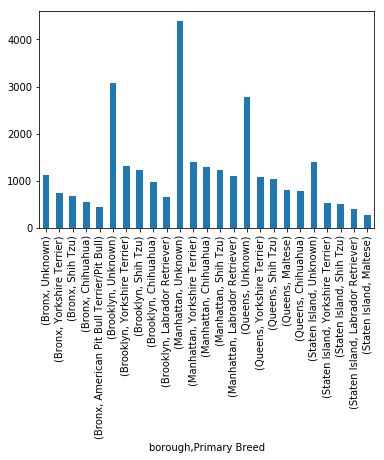

In [99]:
new_merge.groupby("borough")['Primary Breed'].value_counts().groupby(level=0).head(5).plot(kind='bar')

## What percentage of dogs are not guard dogs?

In [95]:
not_guard = new_merge['Guard or Trained'] == "No"

In [98]:
not_guard.value_counts(normalize=True)

True     0.604967
False    0.395033
Name: Guard or Trained, dtype: float64